# Regresión Lineal
 
La regresión lineal es un modelo que trata de predecir variables numéricas como precios, cantidades, pesos, etc. Se basa en estimar el valor de la variable a predecir en función de las otras variables observadas.

Es el modelo de regresión más básico. El objetivo es buscar la línea recta que mejor se ajuste a los datos conocidos. Esto se hace buscando la línea tal que la suma de las distancias de los datos a la línea sea mínima.

Entrenar una regresión lineal, al igual que casi todos los modelos, es muy sencillo gracias a las bibliotecas disponibles en los diferentes lenguajes de programación. En este caso usaremos **pandas** y **scikit-learn**, una biblioteca de aprendizaje automático de software gratuito para Python.
 


## Parámetros e hiper parámetros
 
Cuando se va a entrenar un modelo es importante mantener en cuenta cuales son los parámetros y los hiperparámetros del mismo y la diferencia entre estos.
 
Los parámetros de un modelo son aquellos que se ajustan automáticamente en el entrenamiento del modelo, es decir, son aquellos valores que el modelo aprende para que la salida se asemeje a lo que queremos. En el caso de una regresión lineal, los parámetros son la pendiente de la recta y el intercepto, por ejemplo:
 
$Y = mX + b$
 
Los parámetros son $m$ y $b$.
 
Los hiperparámetros de un modelo son aquellos que escogemos, es decir, estos no se aprenden a través de los algoritmos de entrenamiento, sino que se **configuran previamente**. En el caso de la regresión lineal es posible definir si tiene o no un intercepto.

## Regresión Lineal Simple

Comenzemos entrenando un modelo de regresión lineal simple, es decir que solamente tenga una variable predictora y una variable a predecir, en este caso utilizaremos un Dataset extraído de [Kaggle](https://www.kaggle.com/rsadiq/salary) que intentará predecir el salario en base a la antiguedad de un trabajador. 

Luego de la exploración y limpieza del Dataset, los pasos que realizaremos son: 

1. Dividir los datos en **X** (variables predictoras) e **y** (variable a predecir)
2. Dividir los datos en entrenamiento y testo con el método *train_test_split*
3. Importar e instanciar el modelo que utilizaremos y definir hiperparámetros
4. Entrenar el modelo con el método *fit*
5. Testear el modelo con el método *predict*
6. Evaluar la performance con una métrica 

In [1]:
#importamos las librerías que utilizaremos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("salario.csv")

#### Exploración y limpieza del Dataset

Realizaremos una pequeña exploración del dataset para confirmar qué variables tiene, si tiene datos nulos, si tiene datos numéricos, la distribución de las variables y la relación entre las mismas.

In [3]:
# Observamos los primeros registros del dataset

data

,anios_experiencia,salario
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,6015
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
# vemos la información del dataset: cantidad de registros, tipos de dato y nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   anios_experiencia  35 non-null     float64
 1   salario            35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [5]:
# Vemos la distribución de las variables
data.describe()

,anios_experiencia,salario
count,35.000000,35.000000
mean,6.308571,79983.285714
std,3.618610,36616.606383
min,1.100000,6015.000000
25%,3.450000,56218.000000
50%,5.300000,67938.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [6]:
# Vemos la correlación entre las variables, como se observa es alta
data.corr()

,anios_experiencia,salario
anios_experiencia,1.000000,0.908476
salario,0.908476,1.000000


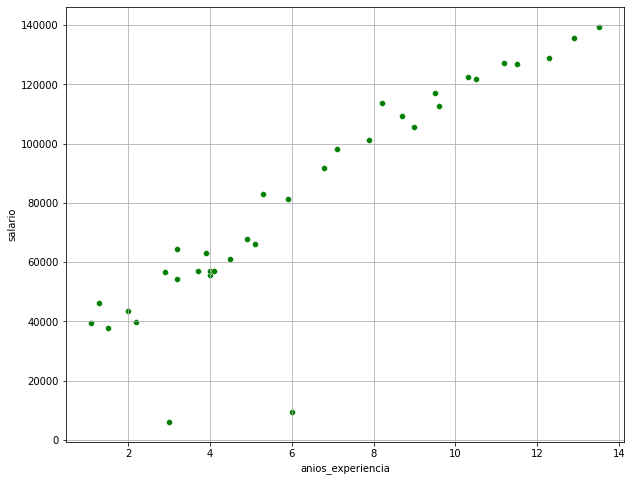

In [7]:
# Realizamos un gráfico para observar la relación entre las variables
plt.figure(figsize = (10,8))
sns.scatterplot(data=data, x="anios_experiencia", y="salario", color = 'g')
plt.grid(True)

#### División de datos en entrenamiento y testeo

En primer lugar vamos a separar el Dataset para crear **X** e **y**:
- **X**: variables predictoras, en este caso *anios_experiencia*
- **y**: variable a predecir, en este caso *salario*

Luego lo separaremos nuevamente entre datos de Entrenamiento y Testeo para lo cual usaremos [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train%20test%20split#sklearn.model_selection.train_test_split) de la librería de Scikit-learn. 

La función **train_test_split** debe recibir, un DataFrame solo con las variables a usar para predecir y, de forma separada, la columna objetivo, adicionalmente le podemos pasar otros parámetros, como la proporción de datos que queremos que tenga el conjunto de prueba (un valor entre 0 o 1) y el random_state, el cual nos permite que, al pasar los mismos datos, con el mismo valor de random_state, se hagan las separaciones iguales, con la finalidad de poder repetir el experimento.  

Siempre importamos justo las funciones que requerimos de scikit-learn, esto lo hacemos ya que la librería es inmensa, con muchísimas funcionalidades y para mantener orden y limpieza en nuestro proyecto es recomendable hacer las importaciones de esta manera.

In [8]:
# División entre variables predictoras y variable a predecir
X = data["anios_experiencia"]
y = data["salario"]

In [9]:
# Confirmamos que se realizo correctamente observando X
print(X.shape)
X.head(3)

(35,)


0    1.1
1    1.3
2    1.5
Name: anios_experiencia, dtype: float64

In [10]:
# Confirmamos que se realizo correctamente observando y

print(y.shape)
y.head(3)

(35,)


0    39343
1    46205
2    37731
Name: salario, dtype: int64

In [11]:
# Importamos train_test_split de la libreria scikit-learn

from sklearn.model_selection import train_test_split 

In [36]:
# Definimos X de entrenamiento y de testeo e y de entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(X.values,y.values, random_state=25)

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(26,)
(26,)
(9,)
(9,)


#### Entrenamiento del modelo

En este caso en primer lugar importaremos e instanciaremos el modelo que utilizaremos, en este caso [regresion lineal](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) de la librería Scikit-Learn. 

Luego realizaremos el **entrenamiento** del modelo con el método *fit* y los **datos de entrenamiento**. El resultado será un modelo entrenado de regresión lineal de la cual podremos ver los parámetros: *pendiente de la recta* e *intercepto*(ordenada al origen).



In [38]:
# Importamos el modelo que utilizaremos. Regresión lineal: 

from sklearn.linear_model import LinearRegression

In [39]:
# Definimos un objeto con el modelo importado, en este caso los hiperparametros son por default por lo que el parentesis está vacio

modelo_rl = LinearRegression()

In [67]:
# Realizamos el entrenamiento del modelo con el método fit y los datos de entrenamiento 

modelo_rl.fit(x_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 9.  11.5  1.5  4.5  3.7  1.1  3.  11.2  6.   4.1  8.7  2.   3.2  1.3
  2.9  6.8 13.5  3.2  5.9  4.   8.2  7.9 10.5  4.9  9.5  2.2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [70]:
x_train

array([ 9. , 11.5,  1.5,  4.5,  3.7,  1.1,  3. , 11.2,  6. ,  4.1,  8.7,
        2. ,  3.2,  1.3,  2.9,  6.8, 13.5,  3.2,  5.9,  4. ,  8.2,  7.9,
       10.5,  4.9,  9.5,  2.2])

In [68]:
x_train.shape

(26,)

In [73]:
x_train.ndim

1

In [69]:
x_train.reshape(-1, 1)

array([[ 9. ],
       [11.5],
       [ 1.5],
       [ 4.5],
       [ 3.7],
       [ 1.1],
       [ 3. ],
       [11.2],
       [ 6. ],
       [ 4.1],
       [ 8.7],
       [ 2. ],
       [ 3.2],
       [ 1.3],
       [ 2.9],
       [ 6.8],
       [13.5],
       [ 3.2],
       [ 5.9],
       [ 4. ],
       [ 8.2],
       [ 7.9],
       [10.5],
       [ 4.9],
       [ 9.5],
       [ 2.2]])

In [71]:
X_train=x_train.reshape(-1, 1)
X_train.shape

(26, 1)

In [72]:
X_train.ndim

2

In [74]:
modelo_rl.fit(x_train.reshape(-1,1), y_train)

LinearRegression()

##### Parámetros 

Los parámetros de una Regresión Lineal son el coeficiente (*pendiente de la recta*) y el intercepto (*ordenada al orignen*: *y* cuando *x=0*), en este caso se obtienden como resultado del entrenamiento del modelo

In [75]:
# Coeficiente (la pendiente de la recta)

modelo_rl.coef_


array([9303.95068859])

In [76]:
# Intercepto (el punto de comienzo de la recta en el eje y)

modelo_rl.intercept_

20583.200442473084

La forma de entender el modelo es que la recta que mejor se ajusta a los datos de entrenamiento es:

> y = 20583.2 + x * 9303.95




In [77]:
x=data["anios_experiencia"]
y=data["salario"]

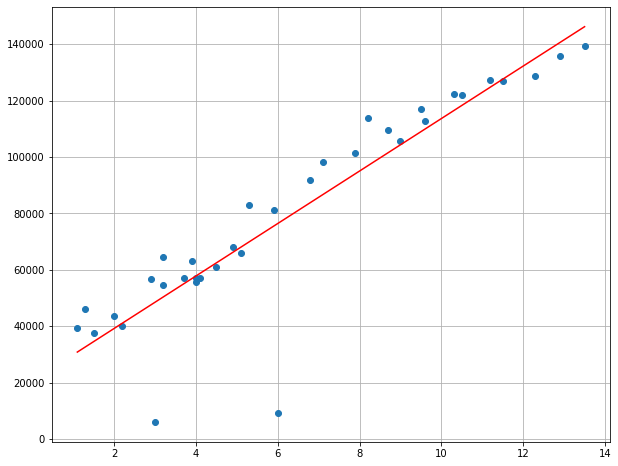

In [78]:
# Realizamos un gráfico para observar la relación entre las variables
plt.figure(figsize = (10,8))
plt.plot(x,y,'o')
plt.plot(x,20583.2 + x * 9303.95,'-r')
plt.grid(True)

#### Testeo del modelo

Ahora probaremos nuestro modelo, para eso utilizaremos el método *predict* con los datos de testeo (X_test) para que realice una predicción. Ese resultado lo compararemos con el resultado real (y_test) utilizando una métrica denominada R2 (que será explicada en profundidad la clase que viene).

Observaremos con visualizaciionesón la regresión lineal resultado del entrenamiento del modelo y los datos de testeo y los datos totales (para las visualizaciones utilizaremos los datos antes de *reshape*, esto solo es para los casos de regresión lineal simple, es decir, una sola variable predictora).

In [79]:
# Probar el modelo con predict y los datos de test
y_pred = modelo_rl.predict(x_test.reshape(-1, 1))
y_pred

array([ 69894.13909202, 140604.16432534, 135021.79391218,  56868.60812799,
        68033.3489543 ,  86641.25033149, 109901.12705298,  57799.00319685,
       116413.89253499])

$${\displaystyle R^2 = \frac {\text{Variance explained by the model}}{\text{Total variance}}}$$

R-squared is always between 0 and 1:

0% represents a model that does not explain any of the variation in the response variable around its mean. The mean of the dependent variable predicts the dependent variable as well as the regression model.
100% represents a model that explains all the variation in the response variable around its mean.

In [80]:
# La métrica que se utiliza para medir la performance de un modelo de regresión lineal es R2

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

#Cuanto más cerca de 1 mejor el modelo

0.9370923376743004

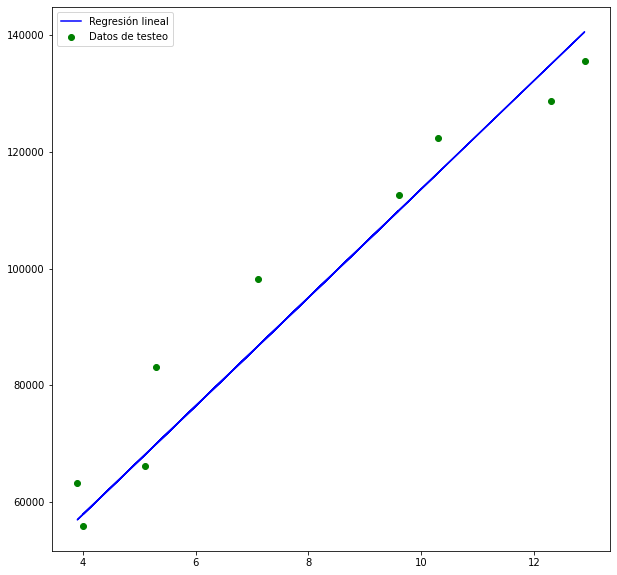

In [63]:
#Visualizaciones de los datos de testeo
# La linea es el modelo (línea de regresión creada por el modelo) y los puntos son los datos de testeo (se usa X_train sin el reshape realizado)

plt.figure(figsize = (10,10))
plt.plot(x_test, y_pred, color = 'b', label = 'Regresión lineal')
plt.scatter(x_test, y_test, color = 'g', label = 'Datos de testeo')
plt.legend()
plt.show()

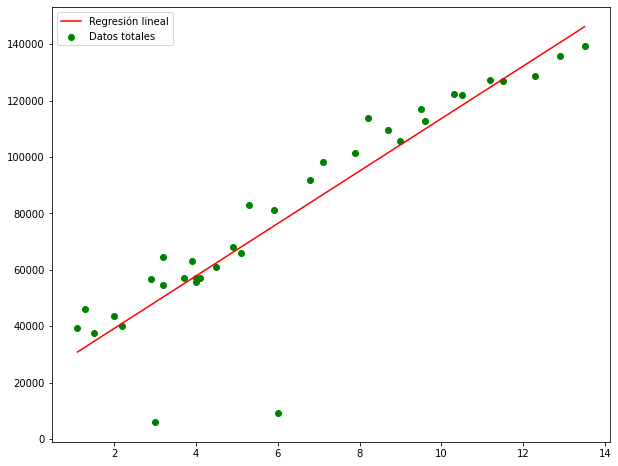

In [66]:
# Visualización con los datos totales
# La linea es el modelo (línea de regresión creada por el modelo) y los puntos son los datos
plt.figure(figsize = (10,8))
plt.plot(x,20583.2 + x * 9303.95, color = 'r', label = 'Regresión lineal')
plt.scatter(X, y, color = 'g', label = 'Datos totales')
plt.legend()
plt.show()



#### Hiperparámetros

Un hiperparámetros es una variable que se define **antes** del entrenamiento **por el/la Científico/a de datos**.

En la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) de cada modelo se pueden ver los distintos hiperparámetros que se pueden definir.

En la Regresión lineal simple un ejemplo de hiperparámetros es la existencia o no de un intercecpto

>fit_intercept = *True* o *False* (por default True)

Realizaremos los mismos pasos que el caso anterior para poder comparar los resultados. Utilizaremos los mismos datos de testeo y entrenamiento que en el modelo anterior por lo que los dos primeros pasos ya están realizados:

1. Dividir los datos en **X** (variables predictoras) e **y** (variable a predecir)
2. Dividir los datos en entrenamiento y testo con el mètodo *train_test_split*
3. Importar e instanciar el modelo que utilizaremos y definir hiperparámetros
4. Entrenar el modelo con el método *fit*
5. Testear el modelo con el método *predict*
6. Ver la performance con una métrica y comparar los distintos modelos entrenados

Luego visualizaremos los dos modelos entrenados con los datos de testeo y con los datos totales.

##### Instanciar y entrenar el modelo

In [ ]:
# Al momento de instanciar el modelo se definen los hiperparámetros

modelo_sin_inter = LinearRegression(fit_intercept = False)


In [ ]:
# Se entena el modelo sin intercepto (se usa x_train con el reshape ya realizado)

modelo_sin_inter.fit(X_train, y_train)

In [ ]:
# El coeficiente del modelo (la pendiente de la recta)

modelo_sin_inter.coef_

In [ ]:
# El intercepto es 0 debido a que eso es lo que se ha definido

modelo_sin_inter.intercept_

##### Probar el modelo y medir la performance

In [ ]:
# Probar nuestro modelo con los datos de test

y_pred_sin_inter = modelo_sin_inter.predict(X_test)

In [ ]:
# La métrica que se utiliza para medir un modelo de regresión lineal es R2

from sklearn.metrics import r2_score
r2_sin_interc = r2_score(y_test,y_pred_sin_inter)
r2_sin_interc

#Cuanto más cerca de 1 mejor el modelo.

##### Comparar la performance de ambos modelos entrenados

In [ ]:
# Es muy bueno pero levemente peor que el anterior

print("el R2 del modelo con intercepto es ", round(r2,2))
print("el R2 del modelo sin intercepto es ", round(r2_sin_interc,2))

In [ ]:
#Visualizaciones de los modelos con los datos de testeo
# Los puntos verdes son los datos de testeo, la línea azul es el modelo y la linea roja es el modelo sin intercepto

plt.figure(figsize = (10,10))
plt.plot(x_test, y_pred, color = 'b',linewidth=3.0,  linestyle = "--", label = 'Regresión lineal')
plt.plot(x_test, y_pred_sin_inter, color = 'r',linewidth=3.0,  linestyle = ":" , label = 'Regresión lineal sin intercepto')
plt.scatter(x_test, y_test, color = 'g', label = 'Datos de testeo')
plt.legend()
plt.show()

In [ ]:
#Visualizaciones de los modelos con los datos totales
# Los puntos verdes son los datos de testeo, la línea azul es el modelo y la linea roja es el modelo sin intercepto

plt.figure(figsize = (10,10))
plt.plot(x_test, y_pred, color = 'b',linewidth=3.0,  linestyle = "--", label = 'Regresión lineal')
plt.plot(x_test, y_pred_sin_inter, color = 'r',linewidth=3.0,  linestyle = ":" , label = 'Regresión lineal sin intercepto')
plt.scatter(X, y, color = 'g', label = 'Datos totales')
plt.legend()
plt.show()